In [35]:
import numpy as np

from scipy.io import savemat, loadmat
import matplotlib.pyplot as plt

In [36]:
#All the grain label from the masking step. Later the corresponding .mat file will be loaded. 
Particle_Dict = {
    '0416P1': ['2440', '1555', '4711', '5190', '4000'],
    '0416P2': ['2684', '1435', '4636', '5382', '4410'],
    '0416P5': ['1400', '1684', '4362', '5712', '3820'],
    '0126P4': ['3286', '2333', '7235', '12719', '10899'],
    '0126P2': ['7630', '2387', '5700', '11435', '9970'],
    '0126P1': ['3970', '2045', '6715', '9940', '8145'],
    
    '0508P2': ['2215', '3847', '8416', '9396', '6400'],
    '0508P5': ['2390', '1450', '3944', '8102', '6656'],
    '0321P1': ['1915', '3950', '9785', '8712', '4242'],
    '0321P2': ['2620', '3831', '10495', '9530', '6340'],
    '0128P1': ['7074', '10550', '30254', '39758', '27592'],

    '0430P6': ['4760', '3445', '8494', '21202', '14800'],
    '0430P8': ['5540', '7345', '14577', '19523', '11173'],
    '0128P4': ['9195', '2600', '13224', '20495', '18216'],
    '0128P2': ['7074', '10550', '30254', '39758', '27592'],
    '0128P5': ['5509', '10531', '17561', '21831', '12820'],

    '0430P7': ['5625', '9414', '13498', '19865', '15239'],
    '0218P2': ['1812', '3517', '4393', '5100', '7007'], #Sequence to check
    '0218P3': ['4417', '7380', '18988', '28852', '21565'],
    '0218P5': ['1494', '2253', '6076', '7142', '4568'],
    #'0128P2': ['11789', '4466', '16781', '21970', '20544'],

    '0319P3': ['4228', '8748', '11450', '27800', '34195'],
    '0430P5': ['3733', '6311', '30000', '36488', '15793'],
    '0319P5': ['11395', '15910', '20355', '33680', '30000'],
    '0319P6': ['18222', '9705', '19035', '35553', '30465'],

}

In [37]:
#All center dictionary
Center_Dict = {
    '0416P1': [45, 47],
    '0416P2': [45, 45],
    '0416P5': [45, 45],
    '0126P4': [65, 64],
    '0126P2': [61, 61],
    '0126P1': [59, 60], 

    '0508P2': [56, 59],
    '0508P5': [56, 47],
    '0321P1': [61, 58],
    '0321P2': [59, 62],
    '0128P1': [110, 111],
    
    '0430P6': [77, 78],
    '0430P8': [80, 80],
    '0128P4': [82, 80],
    '0128P2': [88, 86],
    '0128P5': [80, 83],

    '0430P7': [87, 87],
    '0218P2': [97, 105], 
    '0218P3': [94, 93],
    '0218P5': [99, 100],

    '0319P3': [113, 99],
    '0430P5': [104, 107],
    '0319P5': [116, 112],
    '0319P6': [125, 114],
 
}



In [38]:
#Loading all strain calculations
Particle_to_calculate='0430P5' #Change this to the particle you want to calculate
folder = '/Users/oliverlin/Documents/UIUC/Chen/Data/Decahedral_4D-STEM/20251203_PublicationCode'
StrainFile = list(map(lambda item: folder + "/" + Particle_to_calculate + "/" + item + ".mat", Particle_Dict[Particle_to_calculate]))
print(StrainFile) 

['/Users/oliverlin/Documents/UIUC/Chen/Data/Decahedral_4D-STEM/20251203_PublicationCode/0430P5/3733.mat', '/Users/oliverlin/Documents/UIUC/Chen/Data/Decahedral_4D-STEM/20251203_PublicationCode/0430P5/6311.mat', '/Users/oliverlin/Documents/UIUC/Chen/Data/Decahedral_4D-STEM/20251203_PublicationCode/0430P5/30000.mat', '/Users/oliverlin/Documents/UIUC/Chen/Data/Decahedral_4D-STEM/20251203_PublicationCode/0430P5/36488.mat', '/Users/oliverlin/Documents/UIUC/Chen/Data/Decahedral_4D-STEM/20251203_PublicationCode/0430P5/15793.mat']


In [39]:
##Preparing masks to NaN and make binned masks
import os
current_dir = os.getcwd()
print(current_dir)

mat_data = loadmat(Particle_to_calculate + '_Masking.mat')
mask_slices = ["Mask_" + str(num) for num in Particle_Dict[Particle_to_calculate]]
print(mask_slices)
Mask_list = [mat_data[key] for key in mask_slices]
Mask_array = np.array(Mask_list, dtype=float)
binned_size = (Mask_array[0,:,:].shape[0] + 3) // 4 * 4 / 4
Mask_array_binned = np.empty((5, int(binned_size), int(binned_size)))


for i in range(5):
    Mask_array[i,:,:] = np.where(Mask_array[i,:,:] == 128, 1, Mask_array[i,:,:])
    Mask_array[i,:,:] = np.where(Mask_array[i,:,:] == 2, np.nan, Mask_array[i,:,:])
    Mask_array[i,:,:] = np.where(Mask_array[i,:,:] == 0, np.nan, Mask_array[i,:,:])
    #Mask_array_binned[i,:,:] = padding_binning(Mask_array[i,:,:])
del i


/Users/oliverlin/Documents/UIUC/Chen/Data/Decahedral_4D-STEM/20251203_PublicationCode
['Mask_3733', 'Mask_6311', 'Mask_30000', 'Mask_36488', 'Mask_15793']


In [40]:
mask_number=[str(num) for num in Particle_Dict[Particle_to_calculate]]
print(mask_number[0])

3733


In [41]:
'''
=================================================================================================
Written by Chu-Yun Hwang at 08/19/2024
Rotate referencePoint to the similar degree of g first to elimiate large angle difference between g and referencePoint
=================================================================================================
'''

import math
def Rotate_ref_g(vectList, xDir, n, g_int):
    '''
    Need to align the reference_g to the similar degree of g first
    
    vectlist: g1 g2 info
    xDir:[1, 1] reference axis x is g1+g2
    n: Refernce point in vectlist to calculate the rotation degree
    g_int: initial input of g1 g2 reference, 3*2: [center, vectG1Ref, vectG2Ref], center is neglected
    '''
    g1=vectList[n,2:4]
    g2=vectList[n,4:6]
    g_int1=g_int[1,0:2]
    g_int2=g_int[2,0:2]

    theta_SEND = np.arctan2(xDir[0]*g1[1] + xDir[1]*g2[1], xDir[0]*g1[0] + xDir[1]*g2[0])
    theta_int = np.arctan2(xDir[0]*g_int1[1] + xDir[1]*g_int2[1], xDir[0]*g_int1[0] + xDir[1]*g_int2[0])
    theta = theta_SEND-theta_int
    
    rotMat = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    ref_g = rotMat @ np.hstack((g_int1.reshape(2,1), g_int2.reshape(2,1)))
    
    theta = theta*180/math.pi

    g = np.vstack((g1, g2))
    referencePoint = np.vstack((g_int[0], ref_g.T))
    return g, referencePoint, theta

In [42]:
def parseRefPoint(vectList, referencePoint):
    '''
    parse reference point from vectList
    referencePoint can be 1*1, 1*2 or 3*2 matrix
    1*1: reference point index
    1*2: start and end index of reference point
    3*2: [center, vectG1Ref, vectG2Ref], center is neglected

    Parameters
    ----------
    vectList : ndarray
        n*16 matrix:[nvect0(x),nvect0(y),nvectG1(x),nvectG1(y),nvectG2(x),nvectG2(y),fval,varMat(1:9)]
    referencePoint : ndarray
    Returns
    -------
    vectG1Ref : ndarray
        1*2 matrix: [x,y], reference point in G1
    vectG2Ref : ndarray
        1*2 matrix: [x,y], reference point in G2
    '''
    #extract vectG1 and vectG2 from vectList
    
    vectG1 = vectList[:,2:4]
    vectG2 = vectList[:,4:6]

    #parse reference point
    if type(referencePoint) != np.ndarray:
        referencePoint = np.array([referencePoint])
    if referencePoint.shape == (1,):
        vectG1Ref = vectG1[referencePoint,:]
        vectG2Ref = vectG2[referencePoint,:]
    elif referencePoint.shape == (1,2):
        vectG1Ref = np.mean(vectG1[referencePoint[0]:referencePoint[1],:], axis=0)
        vectG2Ref = np.mean(vectG2[referencePoint[0]:referencePoint[1],:], axis=0)
    elif referencePoint.shape == (3,2):
        vectG1Ref = referencePoint[1,:]
        vectG2Ref = referencePoint[2,:]
    else:
        raise ValueError('referencePoint should be 1*1, 1*2 or 3*2 matrix')
    return vectG1Ref, vectG2Ref

def calStrainMatrix(vectList, xDir, referencePoint):
    '''
    refactor calStrainMatrix.m in python

    Parameters
    ----------
    vectList : ndarray
        n*16 matrix:[nvect0(x),nvect0(y),nvectG1(x),nvectG1(y),nvectG2(x),nvectG2(y),fval,varMat(1:9)]
    xDir : ndarray
        1*2 matrix: [n,m], x direction = nG1 + mG2
    referencePoint : ndarray
        3*2 matrix: [x,y], reference point or
        1*1 matrix: [n], reference point index
        1*2 matrix: series of reference point index
    Returns
    -------
    strainMat : ndarray
        n*4 matrix: [exx,eyy,exy,theta]

    '''

    vectG1 = vectList[:,2:4]
    vectG2 = vectList[:,4:6]

    # transformation due to EMPAD data reading

    # rotation_matrix = np.array([[0, -1],
    #                             [1, 0]])
    # vectG1 = vectG1 @ np.transpose (rotation_matrix)
    # vectG2 = vectG2 @ np.transpose (rotation_matrix)

    vectG1Ref, vectG2Ref = parseRefPoint(vectList, referencePoint)
     
    #calculate relative rotation angle between DP x axis and reference x axis
    phi = np.arctan(-(xDir[0]*vectG1Ref[1] + xDir[1]*vectG2Ref[1])/(xDir[0]*vectG1Ref[0] + xDir[1]*vectG2Ref[0]))
 
    rotMat = np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi), np.cos(phi)]])
    #construct the reference matrix and rotate to reference frame
    G0 = rotMat @ np.hstack((vectG1Ref.reshape(2,1), vectG2Ref.reshape(2,1)))
    #stack vectG1 and vectG2 into 2*2*n matrix as column vectors and rotate to reference frame
    G = rotMat @ np.transpose(np.hstack((vectG1, vectG2)).reshape(-1,2,2), axes=(0,2,1))
    ''' 
    G0 = np.hstack((vectG1Ref.reshape(2,1), vectG2Ref.reshape(2,1)))
    G = np.transpose(np.hstack((vectG1, vectG2)).reshape(-1,2,2), axes=(0,2,1))
    '''
    #transpose G
    G = np.transpose(G, axes=(0,2,1))    
    
    #calculate deformation matrix

    D = np.linalg.inv(G,) @ G0.T


    GL_strain = 0.5*(np.transpose(D, axes=(0,2,1)) @ D - np.eye(2))
    
    H = D - np.eye(2)
    H_strain = 0.5*(np.transpose(H, axes=(0,2,1)) + H + np.transpose(H, axes=(0,2,1))@H)
    displacementMat = np.vstack((H[:,0,0], H[:,1,0], H[:,0,1], H[:,1,1]))
    
    GL_strainMat = np.vstack((GL_strain[:,0,0]*100, GL_strain[:,1,0]*100, GL_strain[:,0,1]*100, GL_strain[:,1,1]*100))
    H_strainMat = np.vstack((H_strain[:,0,0]*100, H_strain[:,1,0]*100, H_strain[:,0,1]*100, H_strain[:,1,1]*100))
    #polar decomposition
    theta = np.arctan((D[:,1,0] - D[:,0,1])/(D[:,1,1] + D[:,0,0]))
    F = np.moveaxis(np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]]), 2, 0) @ D
    #calculate strain matrix
    eMat = F - np.eye(2)
    strainMat = np.vstack((eMat[:,0,0]*100, eMat[:,1,1]*100, eMat[:,0,1]*100, theta*180/np.pi))
    deformMat = np.vstack((D[:,0,0], D[:,1,0], D[:,0,1], D[:,1,1]))
    return strainMat, deformMat, displacementMat, GL_strainMat, H_strainMat, phi, H

def estimateErrorMatrix(vectList, xDir, referencePoint):
    '''
    Parameters
    ----------
    vectList : ndarray
        n*16 matrix:[nvect0(x),nvect0(y),nvectG1(x),nvectG1(y),nvectG2(x),nvectG2(y),fval,varMat(1:9)]
    xDir : ndarray
        1*2 matrix: [n,m], x direction = nG1 + mG2
    referencePoint : ndarray
        3*2 matrix: [x,y], reference point or
        1*1 matrix: [n], reference point index
        1*2 matrix: series of reference point index
    Returns
    -------
    errorMat : ndarray
        n*2 matrix: [errGx, errGy]
    '''
    vectG1Ref, vectG2Ref = parseRefPoint(vectList, referencePoint)
    
    vectGxRef = xDir[0]*vectG1Ref + xDir[1]*vectG2Ref
    # dot((xDir(1)*vectG1Ref + xDir(2)*vectG2Ref), vectG1Ref + k*vectG2Ref) = 0
    k = -(xDir[1]/xDir[0]*np.dot(vectG1Ref,vectG2Ref)+np.dot(vectG1Ref,vectG1Ref))/ \
         (xDir[1]/xDir[0]*np.dot(vectG2Ref,vectG2Ref)+np.dot(vectG1Ref,vectG2Ref))
    vectGyRef = k*vectG2Ref + vectG1Ref
    varMat = vectList[:,7:16].reshape(-1,3,3)
    Gx = np.array([0, xDir[0], xDir[1]])
    Gy = np.array([0, 1, k])
    errGx = np.sqrt(np.dot(Gx, (varMat @ Gx).T))/np.linalg.norm(vectGxRef) * 100
    errGy = np.sqrt(np.dot(Gy, (varMat @ Gy).T))/np.linalg.norm(vectGyRef) * 100
    return errGx, errGy

/var/folders/p4/0y24pksj6r556s5p3vvzn83c0000gn/T/ipykernel_52881/4087980155.py:43: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import center_of_mass


This is COM:[-51.77270252  21.44387735]
slice= 12223 , theta= -158.03012490849216
[[  0.           0.        ]
 [ 35.20474351  -8.3192749 ]
 [-19.57711746 -30.41908566]]
3.4759752121767445e-05


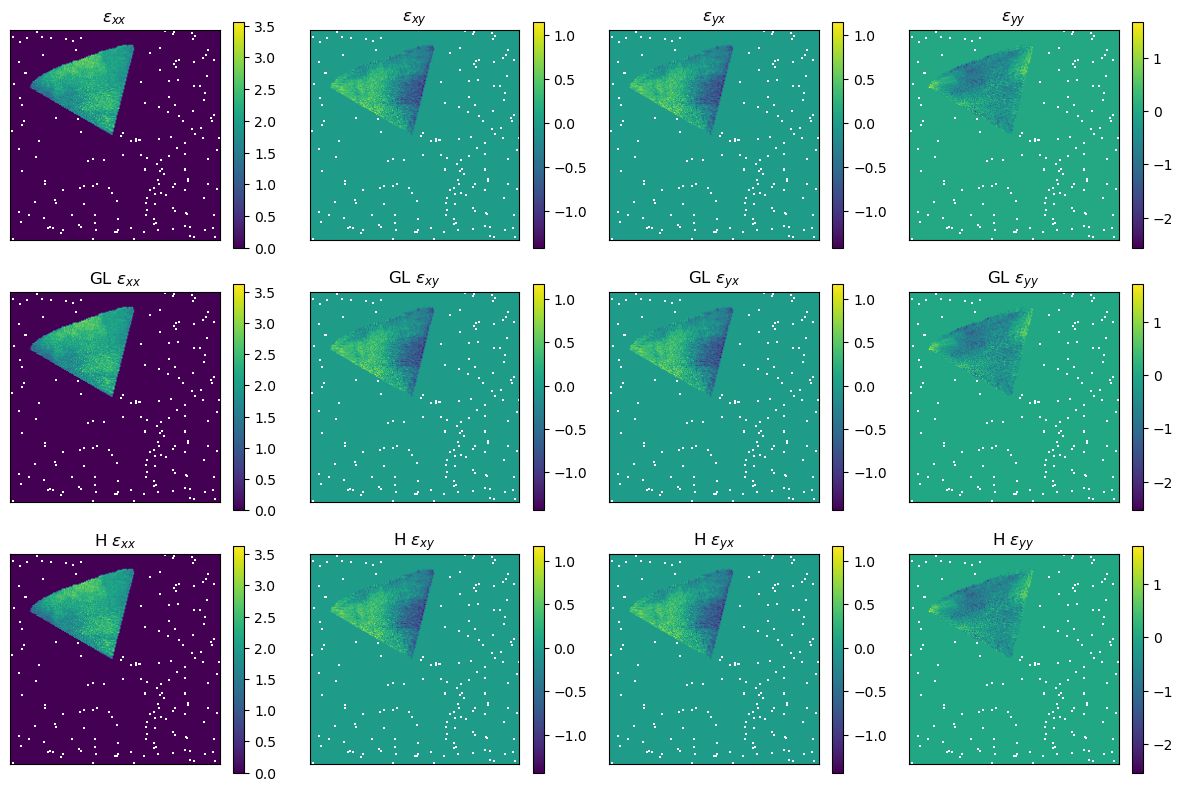

This is COM:[54.64163699 -8.24567769]
slice= 15696 , theta= 309.3358090184962
[[  0.           0.        ]
 [  2.56761346 -36.08312156]
 [-34.8757701    9.60546513]]
0.0010900958821709699


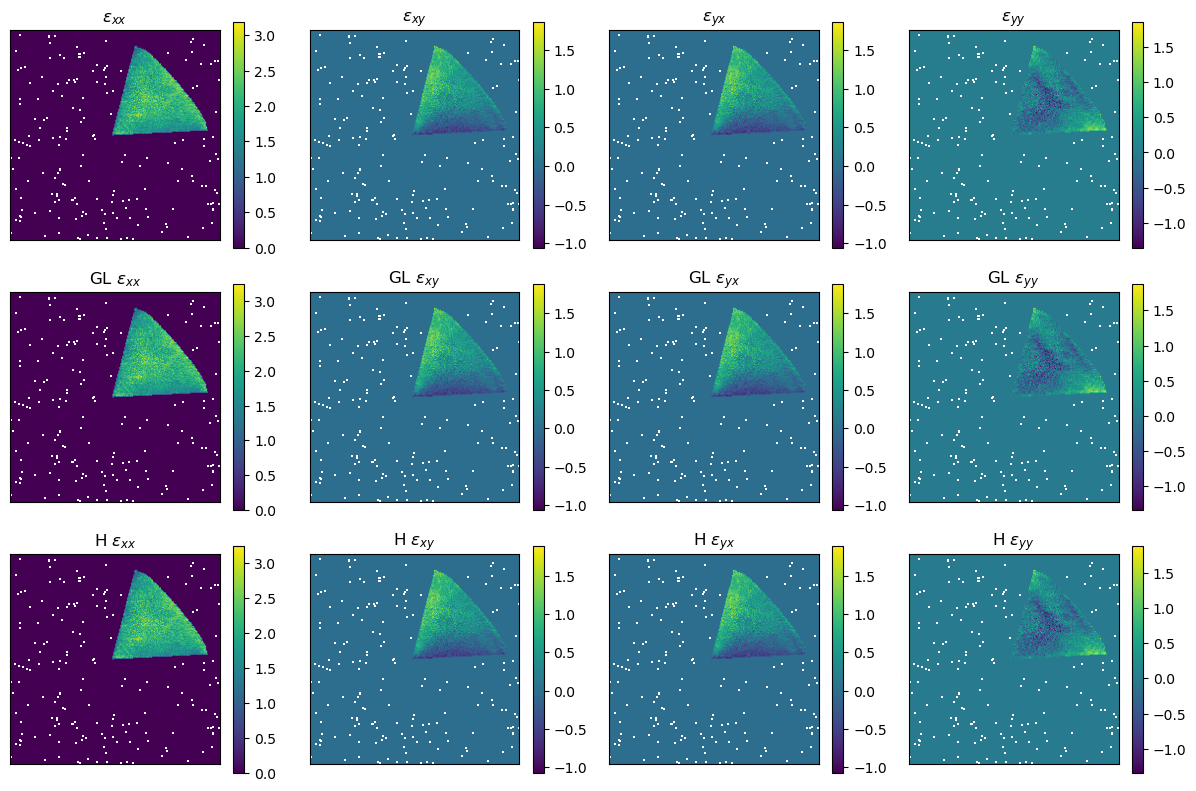

This is COM:[  2.21257456 -55.54583631]
slice= 29546 , theta= 58.06757300396707
[[  0.           0.        ]
 [ 33.3473264   14.01927682]
 [  2.10325061 -36.11316432]]
-6.219111465235688e-05


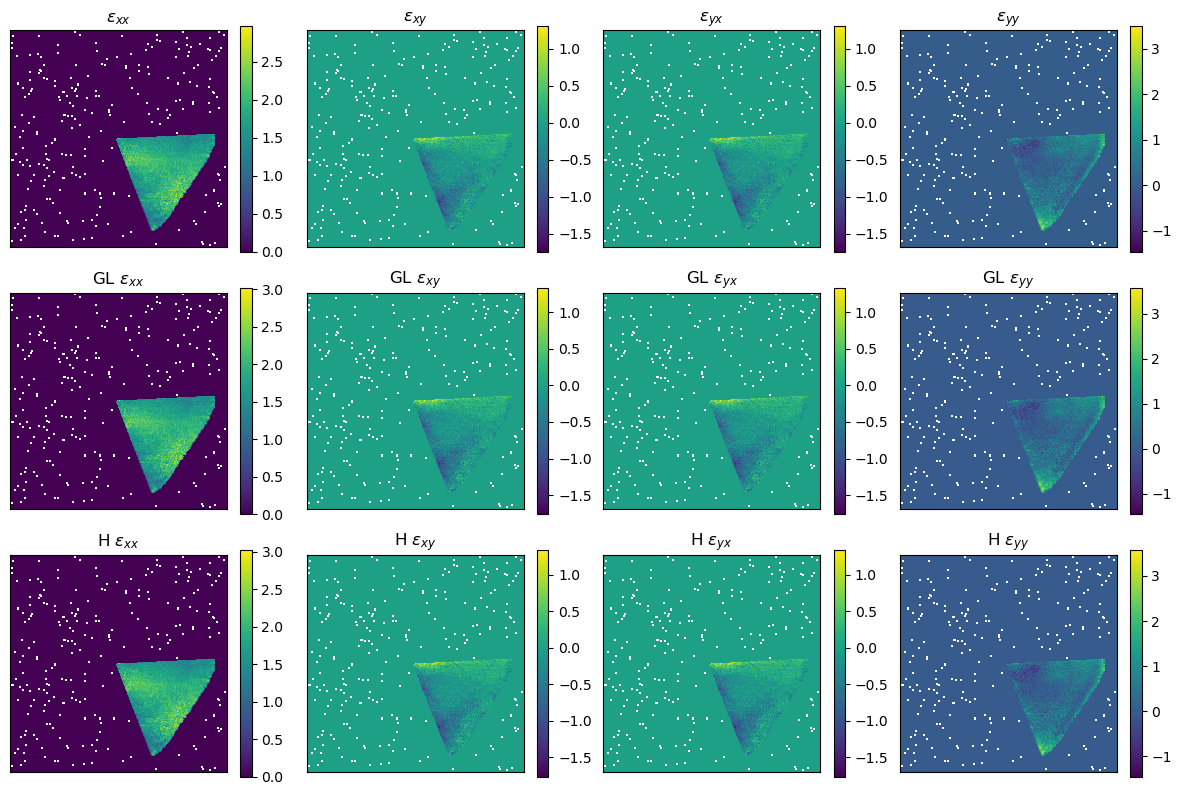

This is COM:[-49.27328748  27.93787146]
slice= 34594 , theta= 166.38597723600466
[[  0.           0.        ]
 [ 23.78982222 -27.2512139 ]
 [-33.62206796 -13.34694146]]
-0.0003105854432944163


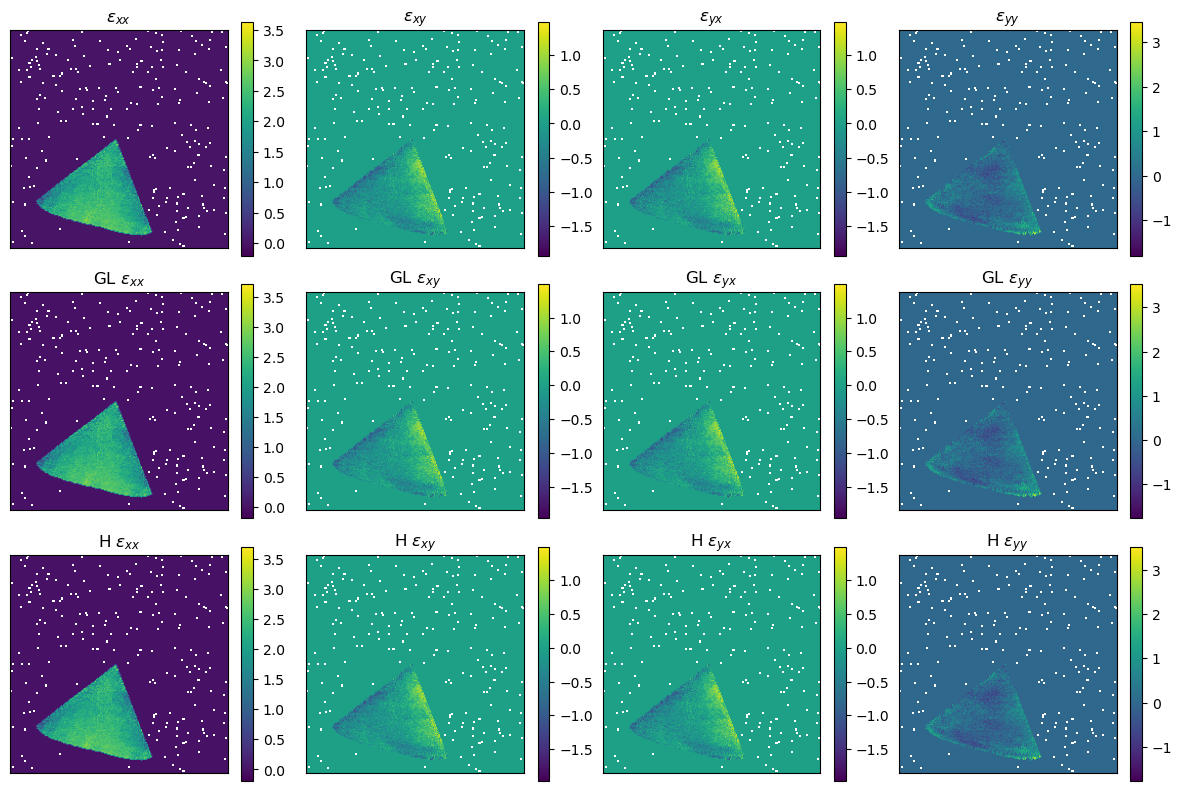

This is COM:[48.55881949 32.61541891]
slice= 23690 , theta= 94.21886822952729
[[  0.           0.        ]
 [ 18.65645656  30.99227209]
 [ 23.0021546  -27.91926189]]
-0.0002321224757680303


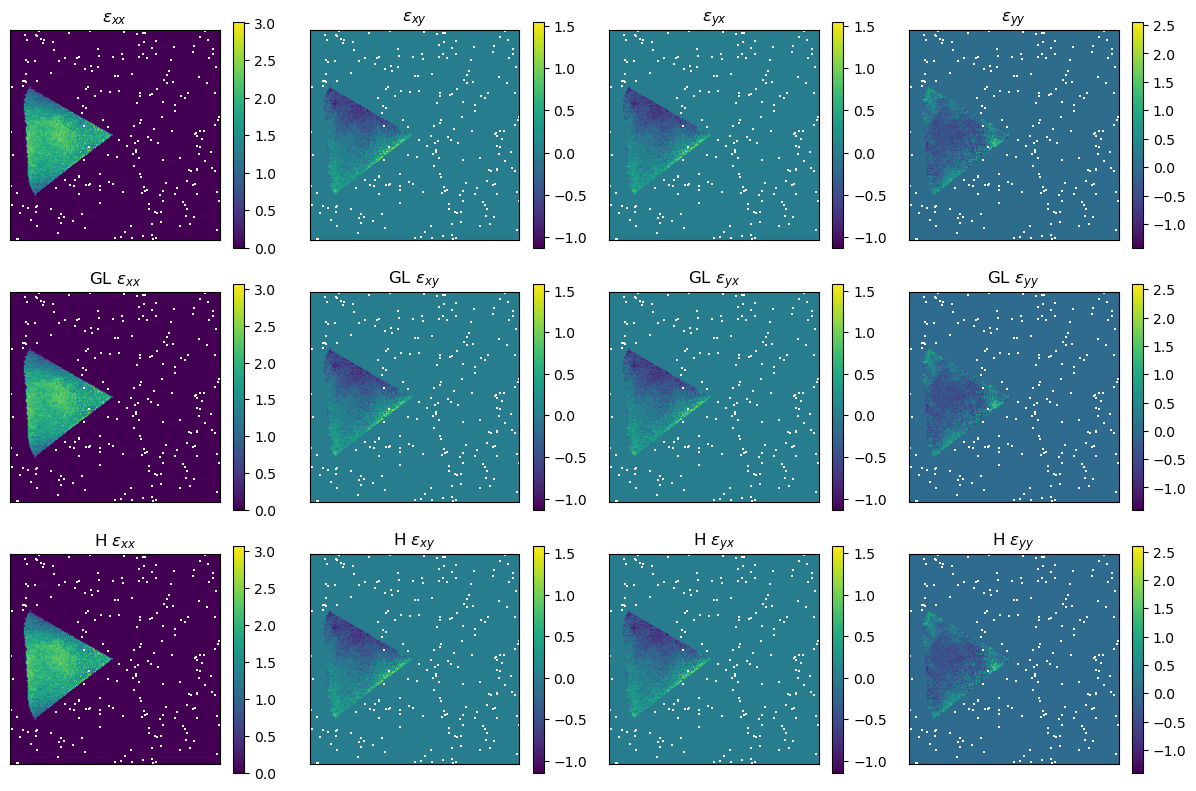

In [43]:
if __name__ == '__main__':
    # xDir = [-1,1]
    exx_dict = {}
    exy_dict = {}
    eyy_dict = {}
    exx_GL_dict = {}
    exy_GL_dict = {}
    eyx_GL_dict = {}
    eyy_GL_dict = {}
    exx_H_dict = {}
    exy_H_dict = {}
    eyx_H_dict = {}
    eyy_H_dict = {}
    Hxx_dict = {}
    Hyy_dict = {}
    Hxy_dict = {}
    Hyx_dict = {}
    phi_dict = {}
    Rotation_dict = {}
    Rotation_average_dict ={}
    Rotation_diff_dict = {}
    flip_dict = {}
    H_dict = {}
    displacementMat_dict = {}
    theta_dict = {}
    mask_number=[str(num) for num in Particle_Dict[Particle_to_calculate]]
    center = np.array(Center_Dict[Particle_to_calculate], dtype = int)

    j = 0
    while j < 5:
        vectList = loadmat(StrainFile[j])
        vectList = vectList['vectList']

        '''
        =================================================================================================
        Written by Chu-Yun Hwang at 08/19/2024
        Rotate referencePoint to the similar degree of g first to eliminate large angle difference between g and referencePoint
        =================================================================================================
        '''
        
        # Rotate referencePoint to the similar degree of g first to eliminate large angle difference between g and referencePoint

        from scipy.ndimage.measurements import center_of_mass
        from scipy.ndimage import rotate
        
        # After transpose correction of g1 and g2, g1 to g2 is counter-clockwise now
        referencePoint_int = np.array([[0, 0],[-29.5358, 20.8859],[29.5358, 20.8859]]) #Talos reference
        referencePoint_final = np.empty((5, 3, 2))

        xDir = np.array([-1, 1]) #g2-g1 as reference axis-x (g220 in 110 zone axis), X-axis pointing to the right

        Mask_array[j] = np.nan_to_num(Mask_array[j], nan=0)
        COM = center_of_mass(Mask_array[j], labels=None, index=None)
        # n = int(COM[0] * Mask_array.shape[2] + COM[1]) #COM pixel location in the mask array

        # #Make sure the n-th data in SEND is in the particle
        # g_in_SEND, referencePoint, theta = Rotate_ref_g(vectList, xDir, n, referencePoint_int)

        #Choose nine pixels around the COM to calculate the average angle
        COM_row, COM_col = int(round(COM[0])), int(round(COM[1]))
        thetas = []
        # Loop over 3x3 neighborhood including the center
        for m in [-1, 0, 1]:
            for n_ in [-1, 0, 1]:
                row = COM_row + m
                col = COM_col + n_

                # Bounds check
                if 0 <= row < Mask_array.shape[1] and 0 <= col < Mask_array.shape[2]:
                    n = row * Mask_array.shape[2] + col  # linear index

                    # Check if pixel is inside the particle
                    if Mask_array[j, row, col]:
                        g_in_SEND, referencePoint, theta = Rotate_ref_g(vectList, xDir, n, referencePoint_int)
                        thetas.append(-theta)  # apply your sign convention

        # Average thetas (linear mean)
        if thetas:
            avg_theta = np.mean(thetas)
        else:
            avg_theta = np.nan

        # Tilt the COM of mask to check the angle is right or not

        test_angle = -avg_theta

        rotMat = np.array([[np.cos(test_angle), -np.sin(test_angle)],[np.sin(test_angle), np.cos(test_angle)]])
        COM_array = np.array(COM)  # Convert tuple to NumPy array
        
        #size = int(np.sqrt(len(vectList[:,0])))
        COM_array[0] -= Center_Dict[Particle_to_calculate][1]
        COM_array[1] -= Center_Dict[Particle_to_calculate][0]
        # Center_Dict[Particle_to_calculate]

        COM_rotated = rotMat @ np.hstack(COM_array.reshape(2,1))

        print("This is COM:" + str(COM_rotated))

        if COM_rotated[0] > 0:
            theta = theta + 180
            # print("This is theta:" + str(theta))

        print("slice=",n,", theta=",theta)
        # print (f'g_{j}='+g_in_SEND, f'refg_{j}='+referencePoint)
        
        '''
        =================================================================================================
        '''
       
        strainMat, deformMat, displacementMat, GL_strainMat, H_strainMat, phi, H = calStrainMatrix(vectList, xDir, referencePoint)
        errGx, errGy = estimateErrorMatrix(vectList, xDir, referencePoint)
        size = int(np.sqrt(len(strainMat[0,:])))

        print(referencePoint)
        exx = strainMat[0,:].reshape(size,size) * Mask_array[j]
        eyy = strainMat[1,:].reshape(size,size) * Mask_array[j]
        exy = strainMat[2,:].reshape(size,size) * Mask_array[j]
        Rotation = strainMat[3,:].reshape(size,size) * Mask_array[j]
        Rotation_average = np.nanmean(Rotation)*np.pi/180
        print(Rotation_average)
        Rotation_diff = Rotation - Rotation_average
        exx_GL = GL_strainMat[0,:].reshape(size,size) * Mask_array[j]
        exy_GL = GL_strainMat[1,:].reshape(size,size) * Mask_array[j]
        eyx_GL = GL_strainMat[2,:].reshape(size,size) * Mask_array[j]
        eyy_GL = GL_strainMat[3,:].reshape(size,size) * Mask_array[j]
        exx_H = H_strainMat[0,:].reshape(size,size) * Mask_array[j]
        exy_H = H_strainMat[1,:].reshape(size,size) * Mask_array[j]
        eyx_H = H_strainMat[2,:].reshape(size,size) * Mask_array[j]
        eyy_H = H_strainMat[3,:].reshape(size,size) * Mask_array[j]

    
        
        # displacementMat_2D=displacementMat.reshape(2,2,size,size).transpose(2,3,0,1)
        Hxx = displacementMat[0,:].reshape(size,size) * Mask_array[j]
        Hxy = displacementMat[1,:].reshape(size,size) * Mask_array[j]
        Hyx = displacementMat[2,:].reshape(size,size) * Mask_array[j]
        Hyy = displacementMat[3,:].reshape(size,size) * Mask_array[j]

        plt.figure(figsize=(12, 8))
        #data_array = [Hxx,Hxy,Hyx,Hyy,displacementMat_2D[:,:,0,0],displacementMat_2D[:,:,0,1],displacementMat_2D[:,:,1,0],displacementMat_2D[:,:,1,1],Rotation]
        #titles = ['Hxx','Hxy','Hyx','Hyy','raw_xx','raw_xy','raw_yx','raw_yy','Rotation']
        data_array = [exx, exy, exy, eyy, exx_GL, exy_GL, eyx_GL, eyy_GL, exx_H, exy_H, eyx_H, eyy_H]
        titles = [r"$\varepsilon_{xx}$", r"$\varepsilon_{xy}$", r"$\varepsilon_{yx}$", r"$\varepsilon_{yy}$",
                  r"GL $\varepsilon_{xx}$", r"GL $\varepsilon_{xy}$", r"GL $\varepsilon_{yx}$", r"GL $\varepsilon_{yy}$",
                  r"H $\varepsilon_{xx}$", r"H $\varepsilon_{xy}$", r"H $\varepsilon_{yx}$", r"H $\varepsilon_{yy}$"]

        for i, (data_array, title) in enumerate(zip(data_array, titles), 1):
            plt.subplot(3, 4, i)  # Adjust the subplot layout based on your preference
            plt.imshow(data_array, cmap='viridis')  # Use imshow for 2D plots
            plt.title(title)
            plt.xticks([])
            plt.yticks([])
            plt.colorbar()  
        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()
        
        exx[np.isnan(exx)] = 0
        exy[np.isnan(exy)] = 0
        eyy[np.isnan(eyy)] = 0
        Hxx[np.isnan(Hxx)] = 0
        Hyy[np.isnan(Hyy)] = 0
        Hxy[np.isnan(Hxy)] = 0
        Hyx[np.isnan(Hyx)] = 0
        exx_GL[np.isnan(exx_GL)] = 0
        exy_GL[np.isnan(exy_GL)] = 0
        eyx_GL[np.isnan(eyx_GL)] = 0
        eyy_GL[np.isnan(eyy_GL)] = 0
        exx_H[np.isnan(exx_H)] = 0
        exy_H[np.isnan(exy_H)] = 0
        eyx_H[np.isnan(eyx_H)] = 0
        eyy_H[np.isnan(eyy_H)] = 0
        Rotation[np.isnan(Rotation)] = 0
        Rotation_diff[np.isnan(Rotation_diff)] = 0
                
        exx_dict[mask_number[j]] = exx
        exy_dict[mask_number[j]] = exy
        eyy_dict[mask_number[j]] = eyy
        Hxx_dict[mask_number[j]] = Hxx
        Hxy_dict[mask_number[j]] = Hxy
        Hyy_dict[mask_number[j]] = Hyy
        Hyx_dict[mask_number[j]] = Hyx
        exx_GL_dict[mask_number[j]] = exx_GL
        exy_GL_dict[mask_number[j]] = exy_GL
        eyx_GL_dict[mask_number[j]] = eyx_GL
        eyy_GL_dict[mask_number[j]] = eyy_GL
        exx_H_dict[mask_number[j]] = exx_H
        exy_H_dict[mask_number[j]] = exy_H
        eyx_H_dict[mask_number[j]] = eyx_H
        eyy_H_dict[mask_number[j]] = eyy_H
        phi_dict[mask_number[j]] = phi
        H_dict[mask_number[j]] = H
        theta_dict[mask_number[j]] = theta
        Rotation_dict[mask_number[j]] = Rotation
        Rotation_average_dict[mask_number[j]] = Rotation_average
        Rotation_diff_dict[mask_number[j]] = Rotation_diff
#        flip_dict[mask_number[j]]
        displacementMat_dict[mask_number[j]]=displacementMat
        
        j += 1  
    del j
        

In [44]:
print(theta_dict)

{'3733': -158.03012490849216, '6311': 309.3358090184962, '30000': 58.06757300396707, '36488': 166.38597723600466, '15793': 94.21886822952729}


In [45]:
### Calculate symmetry map from 4D-STEM strain mapping

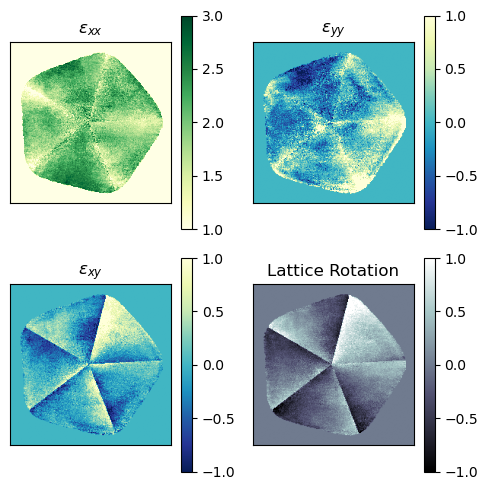

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from matplotlib.colors import Normalize
exx_total = np.sum(list(exx_dict.values()),axis=0)
eyy_total = np.sum(list(eyy_dict.values()),axis=0)
exy_total = np.sum(list(exy_dict.values()),axis=0)
Rotation_total = np.sum(list(Rotation_dict.values()),axis=0)
    
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(5, 5))


im0 = ax[0,0].imshow(exx_total, cmap='YlGn',vmin=1, vmax=3)
ax[0,0].set_title(r"$\varepsilon_{xx}$")
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
plt.colorbar(im0, ax=ax[0,0])

im1 = ax[0,1].imshow(eyy_total, cmap='YlGnBu_r',vmin=-1, vmax=1)
ax[0,1].set_title(r"$\varepsilon_{yy}$")
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
plt.colorbar(im1, ax=ax[0,1])

im2 = ax[1,0].imshow(exy_total, cmap='YlGnBu_r',vmin=-1, vmax=1)
ax[1,0].set_title(r"$\varepsilon_{xy}$")
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])
plt.colorbar(im2, ax=ax[1,0])


im3 = ax[1,1].imshow(Rotation_total, cmap='bone',vmin=-1, vmax=1)
ax[1,1].set_title("Lattice Rotation")
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
plt.colorbar(im3, ax=ax[1,1])

plt.tight_layout()
plt.show()    
    
# -------------------------
# Constants and bulk vectors
# -------------------------
#Talos CL=520 mm 
Bulk_G1 = np.array([-20.8859, -29.5358])
Bulk_G2 = np.array([-20.8859,  29.5358])
# Themis CL=1150 mm
# Bulk_G1 = np.array([-17.7677, -25.2004])
# Bulk_G2 = np.array([-17.7677, -25.2004])

exx_total[exx_total == 0] = np.nan
eyy_total[eyy_total == 0] = np.nan

Bulk_200 = Bulk_G1 + Bulk_G2
Bulk_220 = Bulk_G1 - Bulk_G2

BulkSpacing_200 = 1.0 / (np.linalg.norm(Bulk_200))
BulkSpacing_220 = 1.0 / (np.linalg.norm(Bulk_220))

CalibratedSpacing_220 = (exx_total * 0.01 + 1) * BulkSpacing_220
CalibratedSpacing_200 = (eyy_total * 0.01 + 1) * BulkSpacing_200






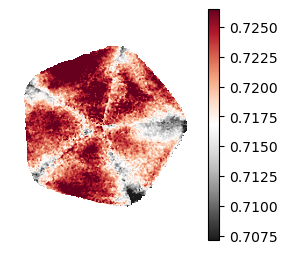

In [50]:
k = CalibratedSpacing_220 / CalibratedSpacing_200
k_medfilt = median_filter(k, size=(2, 2))

plt.figure(figsize=(3, 3))
im = plt.imshow(k_medfilt, vmin=0.7071, vmax=0.7265, cmap='RdGy_r')
plt.xticks([])
plt.yticks([])
plt.colorbar(im)
plt.axis('off')
plt.show()

### Calculate deformation maps from loading 4D-STEM strain mapping results

(2, 2, 213, 213)


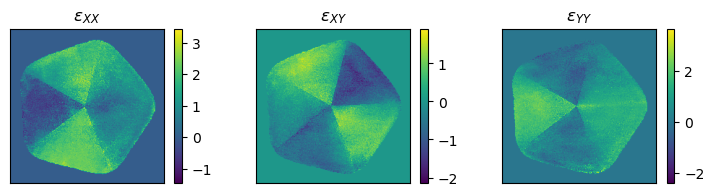

In [11]:
# Set global coordinate (X,Y) as e and each local coordinate (x,y) as e'
# When the coordinate needs to transform from global to local, the rotation matrix is Q(theta) = [cos(theta), -sin(theta); sin(theta), cos(theta)]
# The transformation is e' = Q(theta)^T * e
# But now we have the local coordinate, and we need to transform it to global coordinate with -theta.
# The transformation is e = Q(-theta)^T * e' = Q(theta) * e'
# For case of tensor, e' = Q(theta)^T * e * Q(theta), so e = Q(theta) * e' * Q(theta)^T

e_global = {}
# theta={'3733':-0.38377, '6311': 0.8373, '30000':2.355, '36488':-3.05, '15793':-1.57}
theta = theta_dict

for mask in Particle_Dict[Particle_to_calculate]:

    theta_radian = theta[mask]*np.pi/180

    Q = np.array([[np.cos(theta_radian), -np.sin(theta_radian)],[np.sin(theta_radian), np.cos(theta_radian)]])
    e_local = np.stack([[exx_dict[mask], exy_dict[mask]], [exy_dict[mask], eyy_dict[mask]]])
    e_global[mask] = np.einsum('ab,bcjk,cd->adjk',Q, e_local, np.transpose(Q))
    
# Combine H tensor results from all grains before integration
e_global_array = np.array(list(e_global.values()))
e_global_total = np.sum(e_global_array, axis=0)
#plt.imshow(Hxx_total, cmap='viridis')
print(e_global_total.shape)

# Plot the integration results
fig, ax = plt.subplots(1, 3, figsize=(9,2))

# Plot integration along the x direction
cax1 = ax[0].imshow(e_global_total[0,0], cmap='viridis')
ax[0].set_title(r"$\varepsilon_{XX}$")
ax[0].set_xticks([])
ax[0].set_yticks([])
fig.colorbar(cax1, ax=ax[0], orientation='vertical')

# Plot integration along the y direction
cax2 = ax[1].imshow(e_global_total[0,1], cmap='viridis')
ax[1].set_title(r"$\varepsilon_{XY}$")
ax[1].set_xticks([])
ax[1].set_yticks([])
fig.colorbar(cax2, ax=ax[1], orientation='vertical')

cax3 = ax[2].imshow(e_global_total[1,1], cmap='viridis')
ax[2].set_title(r"$\varepsilon_{YY}$")
ax[2].set_xticks([])
ax[2].set_yticks([])
fig.colorbar(cax3, ax=ax[2], orientation='vertical')

##H_global_total[1,0][50,23]

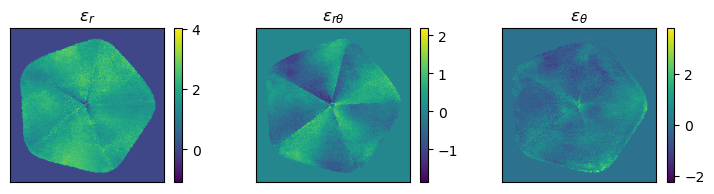

In [12]:
## Validation on the integration method

center=Center_Dict[Particle_to_calculate]

er=np.zeros((size,size))
etheta = np.zeros((size,size))
ertheta = np.zeros((size,size))
costheta = np.zeros((size,size))

for i in range(size):
    for j in range(size):
        if i-center[0] == 0 and j-center[1] >= 0: 
            theta = np.pi/2
        elif i-center[0] == 0 and j-center[1] < 0:
            theta = np.pi*3/2
        else:
            theta = np.arctan((j-center[1])/(i-center[0]))

        # print(theta)
        er[i,j] = 0.5*(e_global_total[0,0][i,j]+e_global_total[1,1][i,j]) + 0.5*(e_global_total[0,0][i,j]-e_global_total[1,1][i,j])*np.cos(2*theta) + e_global_total[0,1][i,j]*np.sin(2*theta)
        etheta[i,j] = 0.5*(e_global_total[0,0][i,j]+e_global_total[1,1][i,j]) - 0.5*(e_global_total[0,0][i,j]-e_global_total[1,1][i,j])*np.cos(2*theta) - e_global_total[0,1][i,j]*np.sin(2*theta)
        ertheta[i,j] = 0.5*(e_global_total[1,1][i,j]-e_global_total[0,0][i,j])*np.sin(2*theta) + e_global_total[0,1][i,j]*np.cos(2*theta)
        costheta[i,j] = np.cos(theta)


cmap = plt.cm.viridis
cmap.set_bad(color='none')  # 'none' sets the NaN regions as transparent

er_plot = er.copy()
# er_plot[er_plot ==0 ] = np.nan
etheta_plot = etheta.copy()
# etheta_plot[etheta_plot == 0] = np.nan
ertheta_plot = ertheta.copy()
# ertheta_plot[ertheta_plot == 0] = np.nan

# fig, ax = plt.subplots(1,3)
# # Define the colormap and set NaN values to be transparent


fig, ax = plt.subplots(1, 3, figsize=(9,2))

# Plot integration along the x direction
cax1 = ax[0].imshow(er_plot, cmap='viridis')
ax[0].set_title(r"$\varepsilon_{r}$")
ax[0].set_xticks([])
ax[0].set_yticks([])
fig.colorbar(cax1, ax=ax[0], orientation='vertical')

# Plot integration along the y direction
cax2 = ax[1].imshow(ertheta_plot, cmap='viridis')
ax[1].set_title(r"$\varepsilon_{r \theta}$")
ax[1].set_xticks([])
ax[1].set_yticks([])
fig.colorbar(cax2, ax=ax[1], orientation='vertical')

cax3 = ax[2].imshow(etheta_plot, cmap='viridis')
ax[2].set_title(r"$\varepsilon_{\theta}$")
ax[2].set_xticks([])
ax[2].set_yticks([])
fig.colorbar(cax3, ax=ax[2], orientation='vertical')

# plt.tight_layout()
# # plt.savefig('cylindrical_0430P5.svg', format='svg', dpi=600) 
# plt.show()

(2, 2, 213, 213)


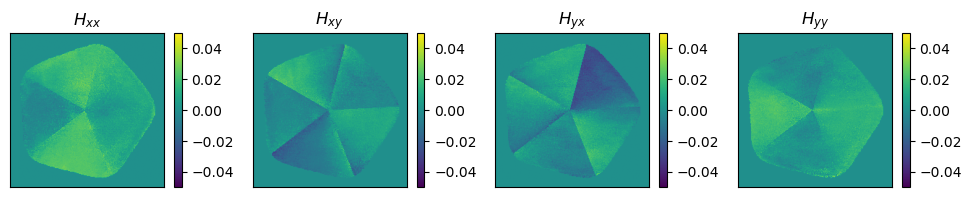

In [13]:
# Set global coordinate (X,Y) as e and each local coordinate (x,y) as e'
# When the coordinate needs to transform from global to local, the rotation matrix is Q(theta) = [cos(theta), -sin(theta); sin(theta), cos(theta)]
# The transformation is e' = Q(theta)^T * e
# But now we have the local coordinate, and we need to transform it to global coordinate with -theta.
# The transformation is e = Q(-theta)^T * e' = Q(theta) * e'
# For case of tensor, e' = Q(theta)^T * e * Q(theta), so e = Q(theta) * e' * Q(theta)^T

H_global = {}
# theta={'3733':-0.38377, '6311': 0.8373, '30000':2.355, '36488':-3.05, '15793':-1.57}

H_theta = theta_dict

for mask in Particle_Dict[Particle_to_calculate]:

    theta_radian = H_theta[mask]*np.pi/180

    Q = np.array([[np.cos(theta_radian), -np.sin(theta_radian)],[np.sin(theta_radian), np.cos(theta_radian)]])
    H_local = np.stack([[Hxx_dict[mask], Hxy_dict[mask]], [Hyx_dict[mask], Hyy_dict[mask]]])
    H_global[mask] = np.einsum('ab,bcjk,cd->adjk',Q, H_local, np.transpose(Q))
    
vmax, vmin = 0.05, -0.05

# Combine H tensor results from all grains before integration
H_global_array = np.array(list(H_global.values()))
H_global_total = np.sum(H_global_array, axis=0)
#plt.imshow(Hxx_total, cmap='viridis')
print(H_global_total.shape)

# Plot the integration results
fig, ax = plt.subplots(1, 4, figsize=(12,2))

# Plot integration along the x direction
cax1 = ax[0].imshow(H_global_total[0,0], cmap='viridis',vmax =vmax, vmin=vmin)
ax[0].set_title(r"$H_{xx}$")
ax[0].set_xticks([])
ax[0].set_yticks([])
fig.colorbar(cax1, ax=ax[0], orientation='vertical')

# Plot integration along the y direction
cax2 = ax[1].imshow(H_global_total[0,1], cmap='viridis',vmax =vmax, vmin=vmin)
ax[1].set_title(r"$H_{xy}$")
ax[1].set_xticks([])
ax[1].set_yticks([])
fig.colorbar(cax2, ax=ax[1], orientation='vertical')

cax3 = ax[2].imshow(H_global_total[1,0], cmap='viridis',vmax =vmax, vmin=vmin)
ax[2].set_title(r"$H_{yx}$")
ax[2].set_xticks([])
ax[2].set_yticks([])
fig.colorbar(cax3, ax=ax[2], orientation='vertical')

cax4 = ax[3].imshow(H_global_total[1,1], cmap='viridis',vmax =vmax, vmin=vmin)
ax[3].set_title(r"$H_{yy}$")
ax[3].set_xticks([])
ax[3].set_yticks([])
fig.colorbar(cax4, ax=ax[3], orientation='vertical')


In [14]:
#X pointing rightwards, Y pointing upward
def calc_disp(Hxx, Hyy, Hxy, Hyx, step_size, center):
    cx,cy = center
    cy-=1
    cx-=1
    ux_loop = np.zeros_like(Hxx)
    uy_loop = np.zeros_like(Hyy)

    for i in range(ux_loop.shape[0]):
        for j in range(uy_loop.shape[1]):
            if j <= cx:
                ux_loop[i, j] = -np.sum(Hxx[i, j:cx] * step_size)
                uy_loop[i, j] = -np.sum(Hyx[i, j:cx] * step_size)
            else:
                ux_loop[i, j] = np.sum(Hxx[i, cx:j] * step_size)
                uy_loop[i, j] = np.sum(Hyx[i, cx:j] * step_size)

            if i <= cy:
                ux_loop[i, j] += np.sum(Hxy[i:cy, j] * step_size)
                uy_loop[i, j] += np.sum(Hyy[i:cy, j] * step_size)
            else:
                ux_loop[i, j] -= np.sum(Hxy[cy:i, j] * step_size)
                uy_loop[i, j] -= np.sum(Hyy[cy:i, j] * step_size)

    return ux_loop, uy_loop

def calculate_gradient(u, step_size):
    """
    Calculate the gradient of u_x in the x and y directions separately.

    Parameters:
    u_x (ndarray): 2D array representing the displacement field in the x direction.

    Returns:
    grad_x (ndarray): Gradient of u_x in the x direction.
    grad_y (ndarray): Gradient of u_x in the y direction.
    """
    grad_x = np.gradient(u, axis=1)/step_size
    grad_y = -np.gradient(u, axis=0)/step_size
    return grad_x, grad_y

In [15]:
ux_loop, uy_loop = calc_disp(H_global_total[0,0], H_global_total[1,1], 
                             H_global_total[0,1], H_global_total[1,0],0.376,center)
# fig, ax = plt.subplots(1, 2, figsize=(10,5))
# ax[0].imshow(ux_loop, cmap='viridis')
# ax[0].set_title('ux')
# ax[1].imshow(uy_loop, cmap='viridis')
# ax[1].set_title('uy')
# plt.show()



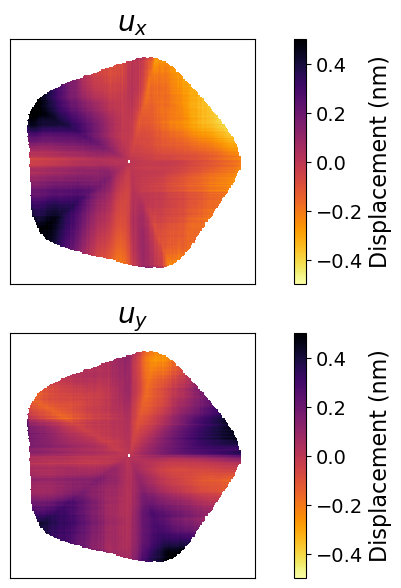

In [16]:
#Plotting displacement fields

Particle_mask = mat_data['Particle_Binary']
u_x_masked = -ux_loop * Particle_mask
u_y_masked = -uy_loop * Particle_mask
u_x_masked[u_x_masked == 0] = np.nan
u_y_masked[u_y_masked == 0] = np.nan


fig, ax = plt.subplots(2, 1, figsize=(10, 7))  # Adjusted to 2 plots; change to 3 if needed

# Set center values to 0
u_x_masked[center[0]-1, center[1]-1] = 0
u_y_masked[center[0]-1, center[1]-1] = 0

# First plot: u_x
im1 = ax[0].imshow(u_x_masked, cmap='inferno_r', vmin=-0.5, vmax=0.5)
ax[0].set_title(r"$u_{x}$", fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])
cbar1 = fig.colorbar(im1, ax=ax[0], orientation='vertical')
cbar1.set_label("Displacement (nm)", fontsize=16) 
cbar1.ax.tick_params(labelsize=14)  # Set the font size of the colorbar labels

# Second plot: u_y
im2 = ax[1].imshow(u_y_masked, cmap='inferno_r', vmin=-0.5, vmax=0.5)
ax[1].set_title(r"$u_{y}$", fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])
cbar2 = fig.colorbar(im2, ax=ax[1], orientation='vertical')
cbar2.set_label("Displacement (nm)", fontsize=16) 
cbar2.ax.tick_params(labelsize=14)  # Set the font size of the colorbar labels

# Save the plot as SVG
# plt.savefig("displacement_fields_0319P3.svg", format='svg', bbox_inches='tight')
# plt.tight_layout()
# plt.show()



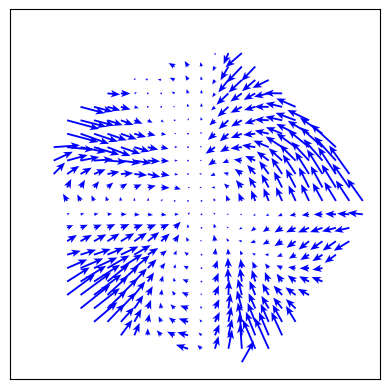

In [17]:
#Combine the X and Y components into a vector field plot
def coarse_grain(X, Y, U, V, factor):
    """
    Coarse grains the given vector field by the specified factor.

    Args:
        X, Y: 2D arrays of the grid coordinates.
        U, V: 2D arrays of the vector components.
        factor: Coarse graining factor.

    Returns:
        X_cg, Y_cg: Coarse grained grid coordinates.
        U_cg, V_cg: Coarse grained vector components.
    """
    shape = (X.shape[0] // factor, X.shape[1] // factor)
    X_cg = X[:shape[0]*factor:factor, :shape[1]*factor:factor]
    Y_cg = Y[:shape[0]*factor:factor, :shape[1]*factor:factor]
    U_cg = U[:shape[0]*factor:factor, :shape[1]*factor:factor]
    V_cg = V[:shape[0]*factor:factor, :shape[1]*factor:factor]
    return X_cg, Y_cg, U_cg, V_cg

# Create a grid of points
x = np.linspace(0, size,size)
y = np.linspace(0, size,size)
X, Y = np.meshgrid(x, y)

U = u_x_masked
V = u_y_masked
factor = 8 # Coarse graining factor
X_cg, Y_cg, U_cg, V_cg = coarse_grain(X, Y, U, V, factor)

# Create a new plot
fig, ax = plt.subplots()

# ax.invert_yaxis()
# magnitude = np.sqrt(U_cg**2 + V_cg**2)
# Add vector field (quiver)
ax.quiver(X_cg, Y_cg, U_cg, V_cg,
          color='blue',
          scale=6,         # Lower scale = bigger arrows
          width=0.005,     # Width of the full arrow shaft
          headlength=5,    # Length of the arrow head
          headwidth=4,     # Width of the arrow head
          headaxislength=4 # Length of the head along the shaft axis
)



ax.set_xticks([])
ax.set_yticks([])    

ax.set_ylim(ax.get_ylim()[1], ax.get_ylim()[0])

# Add labels and title
ax.set_aspect('equal')

# Save the plot as an SVG file
# plt.savefig("displacement_vector_0508P2.svg", format='svg', bbox_inches='tight')

# Show the plot
plt.show()

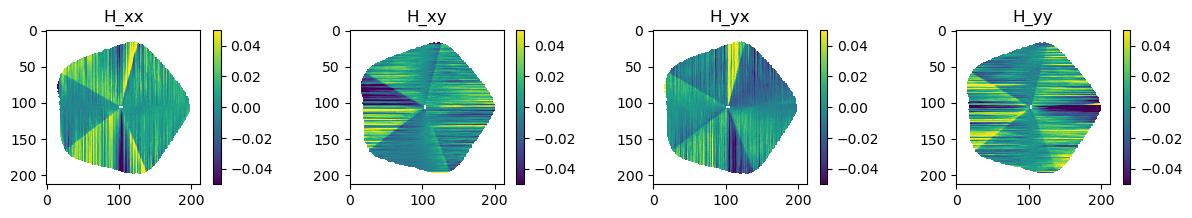

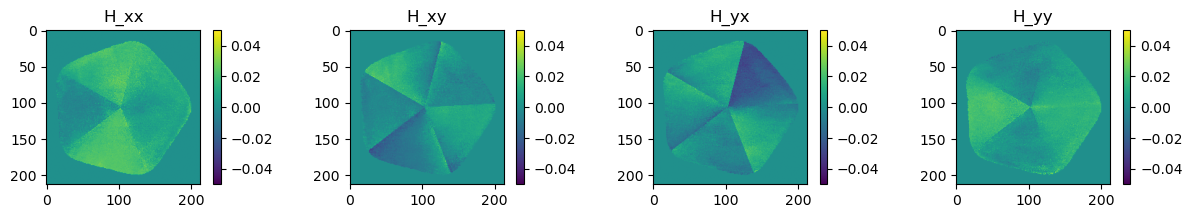

In [18]:
#validating the integration and gradient calculation

ux_x, ux_y = calculate_gradient(-u_x_masked,0.376)
uy_x, uy_y = calculate_gradient(-u_y_masked,0.376)

# Plot the integration results
fig, ax = plt.subplots(1, 4, figsize=(15,2))

# Plot integration along the x direction
cax1 = ax[0].imshow(ux_x, cmap='viridis',vmax =vmax, vmin=vmin)
ax[0].set_title('H_xx')
fig.colorbar(cax1, ax=ax[0], orientation='vertical')

# Plot integration along the y direction
cax2 = ax[1].imshow(ux_y, cmap='viridis',vmax =vmax, vmin=vmin)
ax[1].set_title('H_xy')
fig.colorbar(cax2, ax=ax[1], orientation='vertical')

cax3 = ax[2].imshow(uy_x, cmap='viridis',vmax =vmax, vmin=vmin)
ax[2].set_title('H_yx')
fig.colorbar(cax3, ax=ax[2], orientation='vertical')

cax4 = ax[3].imshow(uy_y, cmap='viridis',vmax =vmax, vmin=vmin)
ax[3].set_title('H_yy')
fig.colorbar(cax4, ax=ax[3], orientation='vertical')
# Plot the integration results
fig, ax = plt.subplots(1, 4, figsize=(15,2))

# Plot integration along the x direction
cax1 = ax[0].imshow(H_global_total[0,0], cmap='viridis',vmax =vmax, vmin=vmin)
ax[0].set_title('H_xx')
fig.colorbar(cax1, ax=ax[0], orientation='vertical')

# Plot integration along the y direction
cax2 = ax[1].imshow(H_global_total[0,1], cmap='viridis',vmax =vmax, vmin=vmin)
ax[1].set_title('H_xy')
fig.colorbar(cax2, ax=ax[1], orientation='vertical')

cax3 = ax[2].imshow(H_global_total[1,0], cmap='viridis',vmax =vmax, vmin=vmin)
ax[2].set_title('H_yx')
fig.colorbar(cax3, ax=ax[2], orientation='vertical')

cax4 = ax[3].imshow(H_global_total[1,1], cmap='viridis',vmax =vmax, vmin=vmin)
ax[3].set_title('H_yy')
fig.colorbar(cax4, ax=ax[3], orientation='vertical')